## Load dataset

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt


X_train_bank = pd.read_csv("../../input/A2-bank/bank_X_train.csv")
X_test_bank = pd.read_csv("../../input/A2-bank/bank_X_test.csv")
y_train_bank = pd.read_csv("../../input/A2-bank/bank_y_train.csv")
y_test_bank = pd.read_csv("../../input/A2-bank/bank_y_test.csv")





## Functions for training and evaluation

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# function for training and evaluating the model
def train_and_evaluate(X_train, y_train, X_test, y_test, dataset_name):
    param_grid = {
        'hidden_layer_sizes': [(2,), (5,), (10,), (100),],  
        'learning_rate_init': [0.001, 0.01, 0.1],    
        'max_iter': [1000, 1500, 2000]                  
    }

    mlp = MLPClassifier(solver='adam', random_state=42)
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train.values.ravel())

    print(f"\nBest parameters for {dataset_name}:", grid_search.best_params_)
    print(f"Best score (accuracy) for {dataset_name}:", grid_search.best_score_)

    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    print(f"Confusion Matrix for {dataset_name}:\n", conf_matrix)

    plot_roc_curve_and_auc(y_test, y_pred_test, dataset_name)
    return best_model

# function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(y_val, y_pred, title):
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

    print(f"ROC AUC Score for {title}: ", roc_auc)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Accuracy for {title}: ", accuracy)
    classification_error = 1 - accuracy
    print(f"Classification Error for {title}: ", classification_error)


## Cross-validation

In [21]:
from sklearn.model_selection import cross_val_score

# define the model (using the best parameters found, from above)
mlp_cv = MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=200, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(mlp_cv, X_train_bank, y_train_bank.values.ravel(), cv=5, scoring='accuracy')

# calculate average classification error in cross-validation
cv_classification_error = np.mean(1 - cv_scores)
print(f"Average Classification Error (Cross-Validation): {cv_classification_error}")


Average Classification Error (Cross-Validation): 0.09013657056145677


## Train and Evaluate the Model for the Bank Dataset


Best parameters for Bank: {'hidden_layer_sizes': (10,), 'learning_rate_init': 0.1, 'max_iter': 1000}
Best score (accuracy) for Bank: 0.9098634294385433
Confusion Matrix for Bank:
 [[692  40]
 [ 44  48]]


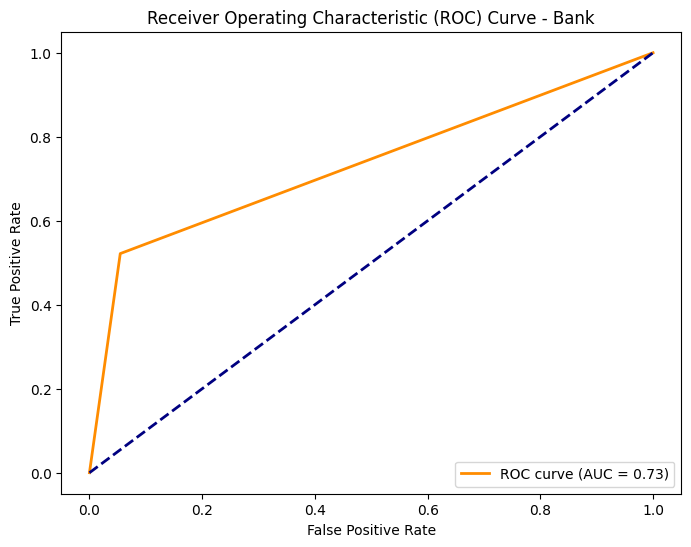

ROC AUC Score for Bank:  0.7335471608458066
Accuracy for Bank:  0.8980582524271845
Classification Error for Bank:  0.10194174757281549
Comparison of Errors - CV Error: 0.09013657056145677, Test Error: 0.10194174757281549


In [22]:
# train and evaluate the model on test data
best_model_bank = train_and_evaluate(X_train_bank, y_train_bank, X_test_bank, y_test_bank, "Bank")

# calculate classification error on the test set
test_accuracy = best_model_bank.score(X_test_bank, y_test_bank)
test_classification_error = 1 - test_accuracy

# Compare with cross-validation error
print(f"Comparison of Errors - CV Error: {cv_classification_error}, Test Error: {test_classification_error}")
